# Reservoir Computing Project #

## Lorenz ##

In [1]:
from reservoirpy.datasets import lorenz
X = lorenz(n_timesteps=2000)

print(X)

[[ 1.          1.          1.        ]
 [ 1.1073228   1.79872164  0.96516196]
 [ 1.40967473  2.74000007  0.97272208]
 ...
 [-0.27309074 -0.50415907  8.98103121]
 [-0.35422832 -0.66790582  8.29546755]
 [-0.46425047 -0.88919121  7.66653225]]


In [2]:
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=100, lr=0.3, sr=1.25)
readout = Ridge(output_dim=3, ridge=1e-5)

In [3]:
esn = reservoir >> readout

In [4]:
predictions = esn.fit(X[:500], X[1:501]).run(X[501:-1])

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0: 500it [00:00, 5163.52it/s]           


Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  9.70it/s]

Running Model-0: 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

Fitting node Ridge-0...


Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]

Running Model-0: 377it [00:00, 3769.65it/s]           

Running Model-0: 785it [00:00, 3950.23it/s]

Running Model-0: 1181it [00:00, 3862.31it/s]

Running Model-0: 1498it [00:00, 3736.45it/s]

In [5]:
from reservoirpy.observables import rmse, rsquare

print("RMSE:", rmse(X[502:], predictions), "R^2 score:", rsquare(X[502:], predictions))

RMSE: 41.99805925796602 R^2 score: -8.214042780130375


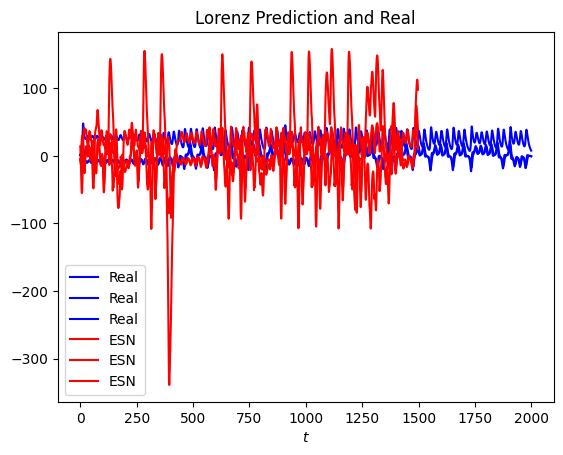

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Lorenz Prediction and Real")
plt.xlabel("$t$")
plt.plot(X,label="Real",color="blue")
plt.plot(predictions,label="ESN",color="red")
plt.legend()
plt.show()

from reservoirpy.observables import rmse, rsquare

print("RMSE:", rmse(X[502:], predictions), "R^2 score:", rsquare(X[502:], predictions))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1,1)
print(X)

[[ 0.00000000e+00]
 [ 1.89251244e-01]
 [ 3.71662456e-01]
 [ 5.40640817e-01]
 [ 6.90079011e-01]
 [ 8.14575952e-01]
 [ 9.09631995e-01]
 [ 9.71811568e-01]
 [ 9.98867339e-01]
 [ 9.89821442e-01]
 [ 9.45000819e-01]
 [ 8.66025404e-01]
 [ 7.55749574e-01]
 [ 6.18158986e-01]
 [ 4.58226522e-01]
 [ 2.81732557e-01]
 [ 9.50560433e-02]
 [-9.50560433e-02]
 [-2.81732557e-01]
 [-4.58226522e-01]
 [-6.18158986e-01]
 [-7.55749574e-01]
 [-8.66025404e-01]
 [-9.45000819e-01]
 [-9.89821442e-01]
 [-9.98867339e-01]
 [-9.71811568e-01]
 [-9.09631995e-01]
 [-8.14575952e-01]
 [-6.90079011e-01]
 [-5.40640817e-01]
 [-3.71662456e-01]
 [-1.89251244e-01]
 [-2.44929360e-16]
 [ 1.89251244e-01]
 [ 3.71662456e-01]
 [ 5.40640817e-01]
 [ 6.90079011e-01]
 [ 8.14575952e-01]
 [ 9.09631995e-01]
 [ 9.71811568e-01]
 [ 9.98867339e-01]
 [ 9.89821442e-01]
 [ 9.45000819e-01]
 [ 8.66025404e-01]
 [ 7.55749574e-01]
 [ 6.18158986e-01]
 [ 4.58226522e-01]
 [ 2.81732557e-01]
 [ 9.50560433e-02]
 [-9.50560433e-02]
 [-2.81732557e-01]
 [-4.5822652

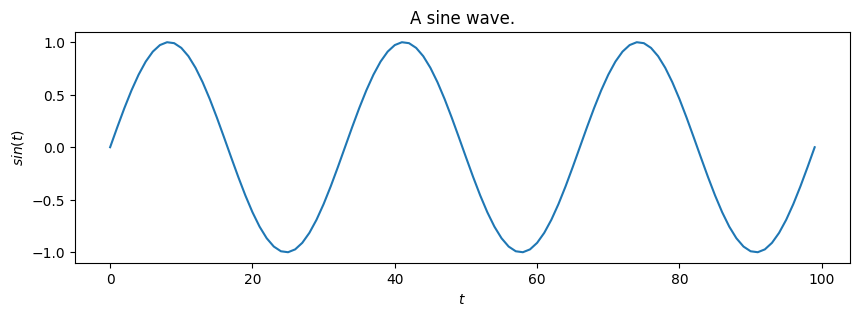

In [10]:
plt.figure(figsize=(10, 3))
plt.title("A sine wave.")
plt.ylabel("$sin(t)$")
plt.xlabel("$t$")
plt.plot(X)
plt.show()

In [15]:
from reservoirpy.nodes import Reservoir

reservoir = Reservoir(100, lr=0.5, sr=0.9)
s = reservoir(X[0].reshape(1, -1))
s = reservoir.state()
states = np.empty((len(X), reservoir.output_dim))
for i in range(len(X)):
    states[i] = reservoir(X[i].reshape(1, -1))

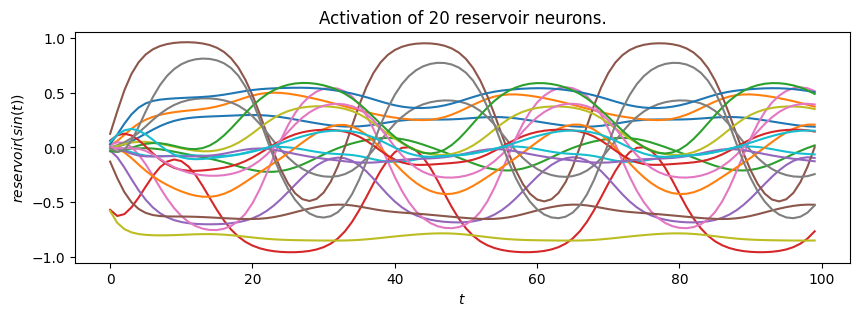

In [19]:
plt.figure(figsize=(10, 3))
plt.title("Activation of 20 reservoir neurons.")
plt.ylabel("$reservoir(sin(t))$")
plt.xlabel("$t$")
plt.plot(states[:, :20])
plt.show()